In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

In [2]:
apple_df = pd.read_csv("AAPL.csv")
apple_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-02-19,324.570007,320.000000,320.000000,323.619995,23496000.0,323.619995
1,2020-02-18,319.750000,314.609985,315.359985,319.000000,38132800.0,319.000000
2,2020-02-14,325.980011,322.850006,324.739990,324.950012,20028400.0,324.950012
3,2020-02-13,326.220001,323.350006,324.190002,324.869995,23686900.0,324.869995
4,2020-02-12,327.220001,321.470001,321.470001,327.200012,28432600.0,327.200012


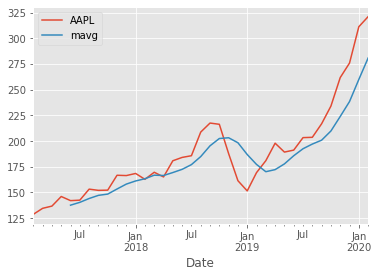

In [7]:
apple_df['Date'] = pd.to_datetime(apple_df['Date'], unit='ns')
apple_upd = apple_df.groupby(['Date'], as_index=False).apply(pd.DataFrame.sort_values, 'Date').reset_index()
apple_upd.drop(columns=['level_0','level_1'], inplace=True)
apple_upd.set_index('Date', inplace=True)
apple_upd = apple_upd.resample('MS').agg({'Open':np.mean, 'High':np.max, 'Low':np.min, 'Close':np.mean, 'Volume':np.mean, 'Adj Close':np.mean})
apple_upd = apple_upd.ffill()

df = apple_upd['Adj Close']
mavg = df.rolling(window=5).mean()

style.use('ggplot')

df.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

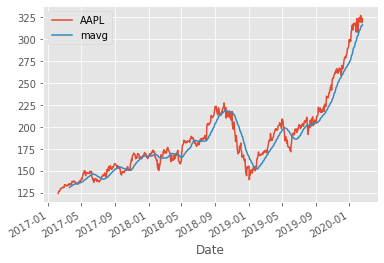

In [11]:
apple_df['Date'] = pd.to_datetime(apple_df['Date'], unit='ns')
apple_upd = apple_df.groupby(['Date'], as_index=False).apply(pd.DataFrame.sort_values, 'Date').reset_index()
apple_upd.drop(columns=['level_0','level_1'], inplace=True)
apple_upd.set_index('Date', inplace=True)
#apple_upd = apple_upd.resample('MS').agg({'Open':np.mean, 'High':np.max, 'Low':np.min, 'Close':np.mean, 'Volume':np.mean, 'Adj Close':np.mean})
apple_upd = apple_upd.ffill()

df = apple_upd['Adj Close']
mavg = df.rolling(window=30).mean()

style.use('ggplot')

df.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()